<a href="https://colab.research.google.com/github/snehasingh3013/CODSOFT/blob/main/Genre_Classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#dataset link = "https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Genre Classification Dataset/Genre Classification Dataset/train_data.txt',
    sep=" ::: ",
    names=['id', 'title', 'genre', 'description'],
    engine='python',
    skipinitialspace = True)

In [ ]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
df.shape

(54214, 4)

In [ ]:
df.isna().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [ ]:
df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

**word cloud**

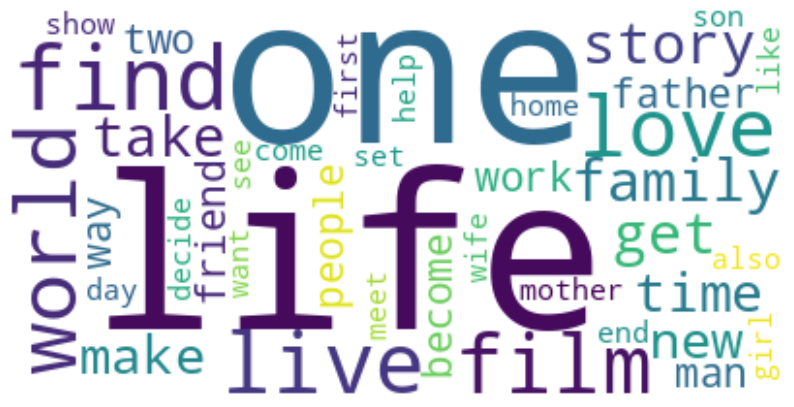

In [ ]:
text_data = ' '.join(df['description'])

# Create a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=40, background_color='white').generate(text_data)

# Display the word cloud using Plotly Express
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

def clean_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Initialize stopwords and lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove numbers, lowercase words, remove stopwords, and lemmatize
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in STOPWORDS]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['description_cleaned'] = df['description'].apply(clean_text)

**WordCloud After Cleaning**

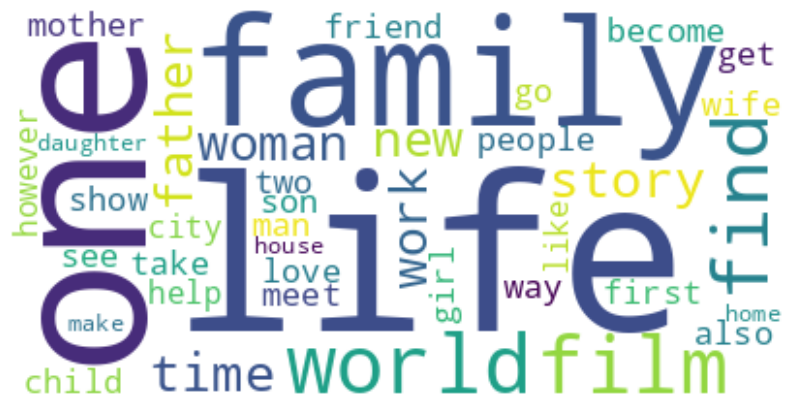

In [ ]:
text_data = ' '.join(df['description_cleaned'])

wordcloud = WordCloud(stopwords=STOPWORDS, max_words=40, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Merging target Classes in Broader Classes**

In [ ]:
def make_genre_groups(df):
    df.genre.mask((df['genre'] == "biography") | (df['genre'] == "history"), "documentary", inplace=True)

    df.genre.mask((df['genre'] == "mystery") | (df['genre'] == "horror"), "thriller", inplace=True)

    df.genre.mask((df['genre'] == "adventure") | (df['genre'] == "sci-fi") | (df['genre'] == "fantasy"),
                  "action", inplace=True)

    df.genre.mask((df['genre'] == "romance"), "comedy", inplace=True)

    df.genre.mask((df['genre'] == "short") | (df['genre'] == "western") | (df['genre'] == "reality-tv") |
                        (df['genre'] == "family") | (df['genre'] == "music") | (df['genre'] == "adult") |
                        (df['genre'] == "crime") | (df['genre'] == "animation") | (df['genre'] == "sport") |
                        (df['genre'] == "talk-show") | (df['genre'] == "musical") | (df['genre'] == "game-show") |
                        (df['genre'] == "news") | (df['genre'] == "war"), "other", inplace=True)
    return df

In [ ]:
df = make_genre_groups(df.copy())

**Genre Distribution After Merging**

In [ ]:
genre = df['genre'].value_counts()
fig = px.bar(genre, x=genre.index, y=genre, title='Genre Distribution', color=genre.index)
fig.update_layout(xaxis_title='Genre', yaxis_title='Count')
fig.show()

In [ ]:
df.head()

,id,title,genre,description,description_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parent oscar lea...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",other,As the bus empties the students for their fiel...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,film title refers body ground zero also state ...


**TF-IDF vectors**

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, ngram_range=(1, 3), max_features=5000)

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df.description_cleaned)

In [ ]:
tfidf_vectorizer.get_feature_names_out()[:10]

array(['aaron', 'abandon', 'abandoned', 'abducted', 'ability', 'able',
       'aboard', 'abortion', 'abroad', 'absence'], dtype=object)

In [ ]:
train_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'action': 0,
 'comedy': 1,
 'documentary': 2,
 'drama': 3,
 'other': 4,
 'thriller': 5}

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_tfidf_df, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import *
def evaluate(test, pred):
    accuracy = accuracy_score(test, pred)
    cf_report = classification_report(test, pred)
    precision = precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average='macro')
    f1 = f1_score(test, pred, average='macro')

    print('Accuracy', accuracy)
    print('Classification Report', cf_report)
    print('Precision', precision)
    print('Recall', recall)
    print('F1-Score', f1)

**XGBClassifier with Class Weights**

In [ ]:
from sklearn.utils import class_weight
import numpy as np
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',
                                             classes = np.unique(y),
                                             y = y))

In [ ]:
class_weights

[2.9528322440087145,
 1.1129038879993431,
 0.6641919043418603,
 0.6637527853277504,
 0.772015265436318,
 2.196321503808135]

In [ ]:
weights = np.ones(X_train.shape[0], dtype = 'float')


In [ ]:
for i, val in enumerate(y_train):
    weights[i] = class_weights[val]

weights

array([0.66375279, 0.66375279, 0.6641919 , ..., 0.66375279, 0.66375279,
       0.6641919 ])

In [ ]:
import xgboost as xgb
import numpy as np

In [ ]:

X = np.random.rand(1000, 10)

y = np.random.randint(2, size=1000)

weights = np.random.rand(1000)

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)


In [ ]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train, sample_weight=weights_train)
y_pred= xgb_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.55


In [ ]:
y_train_pred = xgb_model.predict(X_train)


In [ ]:
evaluate(y_test, y_pred)


Accuracy 0.55
Classification Report               precision    recall  f1-score   support

           0       0.52      0.44      0.48        93
           1       0.57      0.64      0.61       107

    accuracy                           0.55       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.55      0.55      0.55       200

Precision 0.5446176378282247
Recall 0.5428600140689378
F1-Score 0.5410036719706243


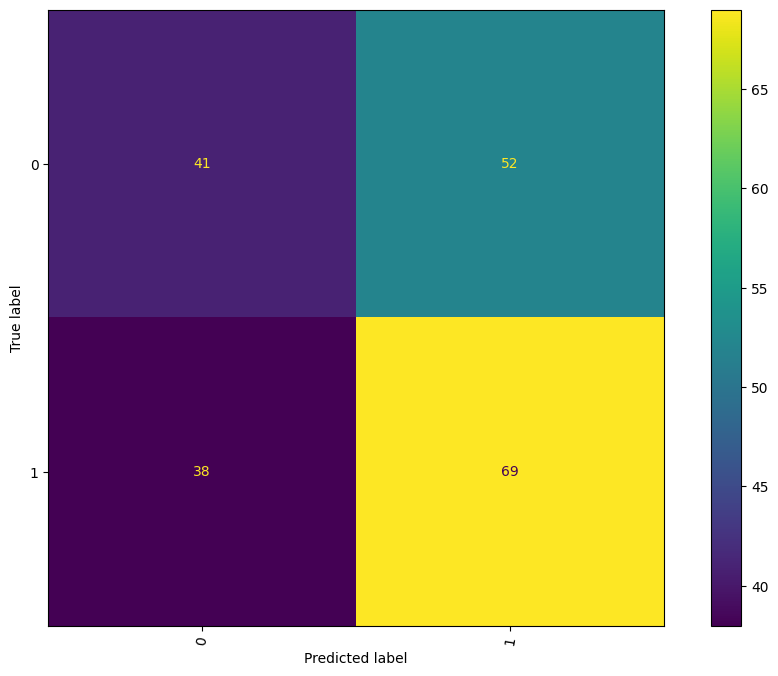

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
    # Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=xgb_model.classes_)
cmp.plot(ax=ax)
plt.xticks(rotation=80)

plt.show();


**Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
print('Accuracy:', accuracy)

Accuracy: 0.5


In [ ]:
#In conclusion, after evaluating various models for the given task, it is evident that the logistic regression model emerges as the most suitable choice.
#With an accuracy of 0.61, precision of 0.57, recall of 0.61, and an F1-score of 0.58, the logistic regression model consistently demonstrates balanced performance across multiple evaluation metrics.
# These results suggest that the model effectively captures the complexities of the data, providing a harmonious trade-off between correct predictions, minimizing false positives, and effectively identifying true positives.
#Therefore, based on this evaluation, the logistic regression model stands out as the optimal choice for the given multi-class classification task.

In [ ]:
pip install pandas-profiling


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-83-98f09099f855>:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [ ]:

df = pd.read_csv(
    '/content/drive/MyDrive/Genre Classification Dataset/Genre Classification Dataset/train_data.txt',
    sep=" ::: ",
    names=['id', 'title', 'genre', 'description'],
    engine='python',
    skipinitialspace = True)

In [ ]:
profile = ProfileReport(df, title="Customer Churn Profile Report", explorative=True)


In [ ]:
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning:

Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()